In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
import glob, os
from PIL import Image
import SimpleITK as sitk

import cv2
from skimage.transform import resize

# Training

In [11]:
path = "/home/gustavogarzon/Downloads/MRI_CT/data/"
pathpngctv2 = "/home/gustavogarzon/Downloads/MRI_CT/pngctv2/"
pathpngctv2ss = "/home/gustavogarzon/Downloads/MRI_CT/pngctv2ss/"
pathpngctv2_binmask = "/home/gustavogarzon/Downloads/MRI_CT/pngctv2_binmask/"

In [12]:
list_ct_pre = []
list_ct = []
list_ct_maskbin = []
list_ct_ss = []

(233, 512, 512) -1024.0 3071.0


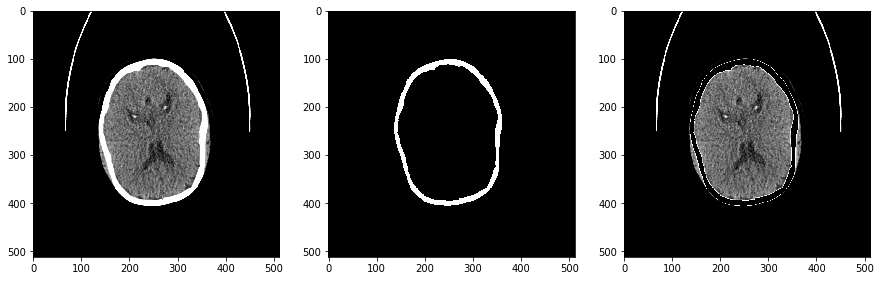

In [7]:
image = sitk.GetArrayFromImage(sitk.ReadImage("/home/gustavogarzon/Downloads/MRI_CT/sub-0001/ct/sub-0001_ct.nii.gz"))
img_min = image.min()
img_max = image.max()
imageorig = np.copy(image)
print(image.shape, img_min, img_max)
#print(image[164,256,:])
image[image<300] = img_min
image[image>=300] = img_max

#window = 2200
#level = 1900
#vmin = level - window/2
#vmax = level + window/2

#plt.imshow(image[164,:,:], cmap="gray", vmin=vmin, vmax=vmax)
#plt.imshow(image[164,:,:], cmap="gray")
#plt.imsave("hola2.png", image[164,:,:], cmap='gray', vmin=vmin, vmax=vmax)
plt.imsave("hola2.png", image[164,:,:], cmap='gray')

window = 120
level = 50
vmin = level - window/2
vmax = level + window/2
#plt.imshow(imageorig[164,:,:], cmap='gray', vmin=vmin, vmax=vmax)
plt.imsave("original2.png", imageorig[164,:,:], cmap='gray', vmin=vmin, vmax=vmax)

im1 = np.array(Image.open("original2.png"))
im2 = np.array(Image.open("hola2.png"))

img = cv2.bitwise_and(im1[:,:,0], im1[:,:,0], mask=(255-im2[:,:,0]))
#img[img>250] = 0

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im1, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(im2, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(img, cmap="gray")
plt.imsave("res.png", img, cmap='gray')

In [ ]:
#path = "/home/usuario/Downloads/ISLES2018/TRAINING/case_1/SMIR.Brain.XX.O.CT.345562/SMIR.Brain.XX.O.CT.345562.nii"
#pathss = "/home/usuario/Downloads/ISLES2018/pngss/"

for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("ct") != -1:
            print("SubCarpeta: ", mysubfolder)
            myfolder = "sub-0037" #MACHETAZO DE CONTROL
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*.nii.gz"):
                #print(file)
                image = sitk.GetArrayFromImage(sitk.ReadImage(file))
                img_min = image.min()
                img_max = image.max()
                
                imageorig = np.copy(image)
                image[image<300] = img_min
                image[image>=300] = img_max
                f = file.split(".nii")[0].split(".")[-1]
                list_ct_pre.append(f)
                print(image.shape, image.min(), image.max(), f)
                
                for s in range(image.shape[0]):
                    if s>136 and s<186:
                        #resize
                        resized = resize(image[s,:,:],(256,256))
                        
                        #bin masks
                        plt.imsave(pathpngctv2_binmask+list_ct_pre[-1]+"-frame"+str(s+1)+".png", resized[:,:], cmap="gray")

                        #Originales
                        window = 120
                        level = 50
                        vmin = level - window/2
                        vmax = level + window/2
                        #plt.imshow(imageorig[s,:,:], cmap='gray', vmin=vmin, vmax=vmax)
                        #resize
                        resized = resize(imageorig[s,:,:],(256,256))
                        plt.imsave(pathpngctv2+list_ct_pre[-1]+"-frame"+str(s+1)+".png", resized[:,:], cmap='gray', vmin=vmin, vmax=vmax)

                        #skull stripping
                        im1 = np.array(Image.open(pathpngctv2+list_ct_pre[-1]+"-frame"+str(s+1)+".png"))
                        im2 = np.array(Image.open(pathpngctv2_binmask+list_ct_pre[-1]+"-frame"+str(s+1)+".png"))

                        #print(im1.shape)
                        #print(im2.shape)

                        #img = im1[:,:,0] - im2[:,:,0]
                        img = cv2.bitwise_and(im1[:,:,0], im1[:,:,0], mask=(255-im2[:,:,0]))
                        img[img>250] = 0

                        plt.figure(figsize=(15,5))
                        #plt.subplot(1,3,1)
                        #plt.imshow(im1, cmap="gray")
                        #plt.subplot(1,3,2)
                        #plt.imshow(im2, cmap="gray")
                        #plt.subplot(1,3,3)
                        #plt.imshow(img, cmap="gray")
                        plt.imsave(pathpngctv2ss+list_ct_pre[-1]+"-frame"+str(s+1)+".png", img, cmap='gray')
            algo = otro

## MRI

In [2]:
path = "/home/gustavogarzon/Downloads/MRI_CT/data/"
pathpngmri = "/home/gustavogarzon/Downloads/MRI_CT/pngmri/"

In [6]:
list_mri_pre = []

Carpeta:  sub-0001
Carpeta:  sub-0002
Carpeta:  sub-0003
Carpeta:  sub-0004
Carpeta:  sub-0005
Carpeta:  sub-0006
Carpeta:  sub-0007
Carpeta:  sub-0008
Carpeta:  sub-0009
Carpeta:  sub-0010
Carpeta:  sub-0011
Carpeta:  sub-0012
Carpeta:  sub-0013
Carpeta:  sub-0014
Carpeta:  sub-0015
Carpeta:  sub-0016
Carpeta:  sub-0017
Carpeta:  sub-0018
Carpeta:  sub-0019
Carpeta:  sub-0020
Carpeta:  sub-0021
Carpeta:  sub-0022
Carpeta:  sub-0023
Carpeta:  sub-0024
Carpeta:  sub-0025
Carpeta:  sub-0026
Carpeta:  sub-0027
Carpeta:  sub-0028
Carpeta:  sub-0029
Carpeta:  sub-0030
Carpeta:  sub-0031
Carpeta:  sub-0032
Carpeta:  sub-0033
Carpeta:  sub-0034
Carpeta:  sub-0035
Carpeta:  sub-0036
Carpeta:  sub-0037


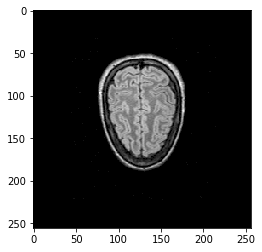

In [27]:
for myfolder in os.listdir(path):
    print("Carpeta: ", myfolder)
    for mysubfolder in os.listdir(path+myfolder):
        if mysubfolder.find("anat") != -1:
            #print("SubCarpeta: ", mysubfolder)
            #myfolder = "sub-0037" #MACHETAZO DE CONTROL
            path2 = path+myfolder+"/"+mysubfolder+"/"
            os.chdir(path2)
            for file in glob.glob("*FLAIR.nii.gz"):
                #print(file)
                image = sitk.GetArrayFromImage(sitk.ReadImage(file))
                img_min = image.min()
                img_max = image.max()
                
                #imageorig = np.copy(image)
                image[image<15] = img_min
                #image[image>=300] = img_max
                f = file.split(".nii")[0].split(".")[-1]
                list_mri_pre.append(f)
                #print(image.shape, image.min(), image.max(), f)
                #print(image[128,98,:])
                
                rv = int((256-image.shape[1])/2)
                rh = int((256-image.shape[2])/2)
                #print(rv, rh)
                        
                for s in range(image.shape[0]):
                    if s>130 and s<185:
                        #resize
                        #resized = resize(image[s,:,:],(256,256))
                        
                        #bin masks
                        #plt.imsave(pathpngctv2_binmask+list_ct_pre[-1]+"-frame"+str(s+1)+".png", resized[:,:], cmap="gray")

                        #Originales
                        window = 200
                        level = 100
                        vmin = level - window/2
                        vmax = level + window/2
                        #plt.imshow(imageorig[s,:,:], cmap='gray', vmin=vmin, vmax=vmax)
                        #resize
                        #resized = resize(image[s,:,:],(256,256))
                        b = np.zeros((256,256))
                        for i in range(rv,rv+image.shape[1]):
                            for j in range(rh,rh+image.shape[2]):
                                b[i,j] = image[s,i-rv,j-rh]
                        #plt.imshow(b[:,:], cmap='gray', vmin=vmin, vmax=vmax)
                        plt.imsave(pathpngmri+list_mri_pre[-1]+"-frame"+str(s+1)+".png", b[:,:], cmap='gray', vmin=vmin, vmax=vmax)

                        #skull stripping
                        #im1 = np.array(Image.open(pathpngctv2+list_ct_pre[-1]+"-frame"+str(s+1)+".png"))
                        #im2 = np.array(Image.open(pathpngctv2_binmask+list_ct_pre[-1]+"-frame"+str(s+1)+".png"))

                        #print(im1.shape)
                        #print(im2.shape)

                        #img = im1[:,:,0] - im2[:,:,0]
                        #img = cv2.bitwise_and(im1[:,:,0], im1[:,:,0], mask=(255-im2[:,:,0]))
                        #img[img>250] = 0

                        #plt.figure(figsize=(15,5))
                        #plt.subplot(1,3,1)
                        #plt.imshow(im1, cmap="gray")
                        #plt.subplot(1,3,2)
                        #plt.imshow(im2, cmap="gray")
                        #plt.subplot(1,3,3)
                        #plt.imshow(img, cmap="gray")
                        #plt.imsave(pathpngctv2ss+list_ct_pre[-1]+"-frame"+str(s+1)+".png", img, cmap='gray')
            #algo = otro